In [123]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

# Get our Datase from keras

In [124]:
# from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [125]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Let's visualize what we want to do

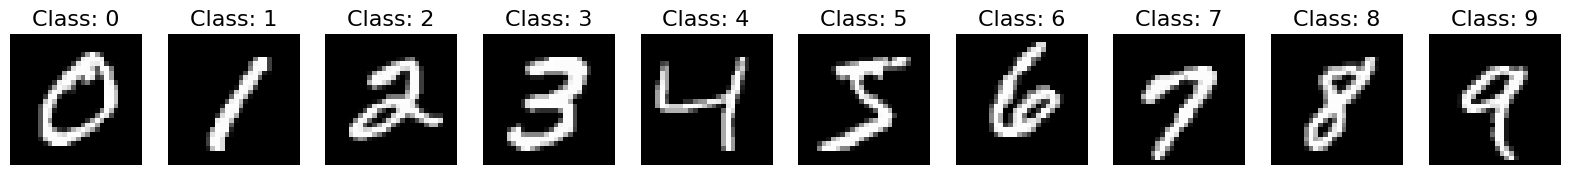

In [126]:
fig, ax = plt.subplots(1, 10, figsize=(20, 20))

for i in range(0, 10):
  sample = x_train[y_train == i][0] #Let's get the labels from 0 - 9 as samples
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Class: {}".format(i), fontsize=16)
  ax[i].axis("off")

# Pre-process our Data

## Convert labels from numbers to categorical (y)

In [127]:
# Before
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [128]:
y_train = tf.keras.utils.to_categorical(y_train, 10) # classes are 0 - 9
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [129]:
# After
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

## Normalize our Data (X)

We do this by converting the color channel values from from 0-255 to 0-1.

In [130]:
x_train = x_train / 255.0
x_test = x_test / 255.0

## Reshape our Data (X)

In [131]:
x_train.shape

(60000, 28, 28)

In [132]:
x_test.shape

(10000, 28, 28)

In [133]:
x_train = x_train.reshape(60000, -1)
x_test = x_test.reshape(10000, -1)

In [134]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Create our Model

In [135]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.25), # 25% of our neurons will be deactivated during training to mitigate overfitting
    tf.keras.layers.Dense(units=10, activation='softmax')]
)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()




Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 128)               100480    
                                                                 
 dense_22 (Dense)            (None, 128)               16512     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Train our Model

In [136]:
BATCH_SIZE = 512
epochs=10
model.fit(x=x_train, y=y_train, batch_size=BATCH_SIZE, epochs=epochs)

Epoch 1/10
118/118 [==============================] - 3s 15ms/step - loss: 0.6200 - accuracy: 0.8199
Epoch 2/10
118/118 [==============================] - 2s 15ms/step - loss: 0.2247 - accuracy: 0.9339
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.1643 - accuracy: 0.9519
Epoch 4/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1320 - accuracy: 0.9613
Epoch 5/10
118/118 [==============================] - 1s 9ms/step - loss: 0.1073 - accuracy: 0.9690
Epoch 6/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0893 - accuracy: 0.9733
Epoch 7/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0784 - accuracy: 0.9764
Epoch 8/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0681 - accuracy: 0.9797
Epoch 9/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0599 - accuracy: 0.9819
Epoch 10/10
118/118 [==============================] - 1s 9ms/step - loss: 0.0534 - accuracy: 0.9

# Use Model to predict given Images

In [137]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss:", loss, "Accuracy", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0720 - accuracy: 0.9772
Loss: 0.07200454920530319 Accuracy 0.9771999716758728


Good result, now let's predict some dataset, for now let's try the x_test again

In [138]:
pred = model.predict(x_test) # this outputs the probability not the actual class
pred = np.argmax(pred, axis=1) # Take the index of of the position with the highest probability
print(pred)


313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [146]:
def show_25_images(images, labels):
  """
  Displays a plot of 25 images and their labels
  """
  # Setup the figure
  plt.figure(figsize=(10, 10))

  # Loop through 25 (for displaying 25 images)
  for i in range(25):

    # Create subplots (5 rows, 5 columns)
    ax = plt.subplot(5, 5, i+1)

    # Display an image
    plt.imshow(images[i], cmap='gray')

    # Add the image label as the title
    plt.title('Prediction: {}'.format(labels[i]))

    # Turn the grid lines off
    plt.axis("off")

In [140]:
#reshape x_train back to its original shape
x_test= x_test.reshape(10000, 28, 28)

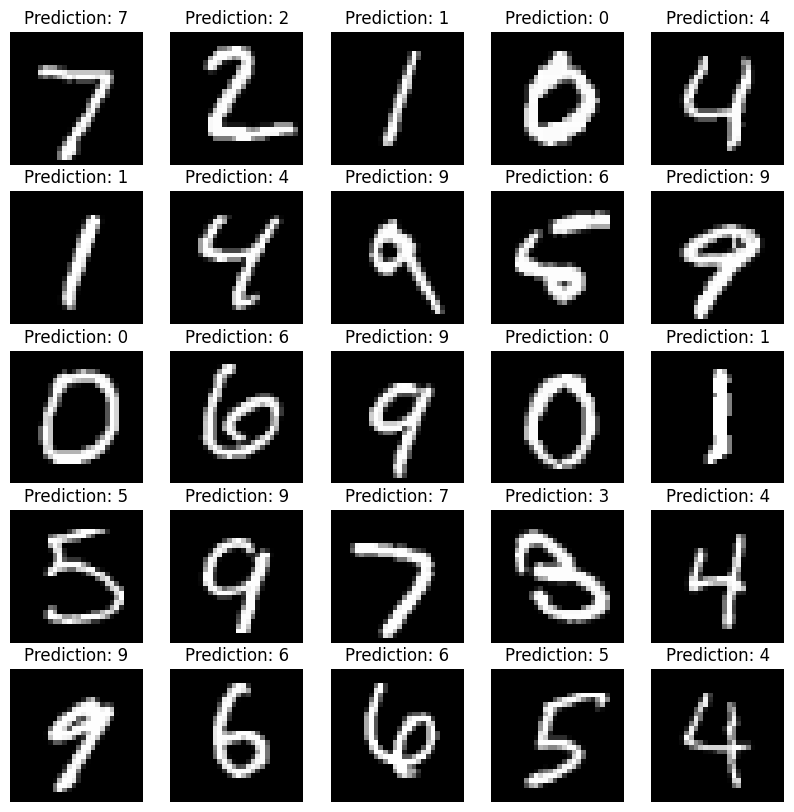

In [141]:
show_25_images(x_test, pred)

# Let's see how well is our Model predicting the images

In [142]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [143]:
pred

array([7, 2, 1, ..., 4, 5, 6])

Let's convert y_test back to its numerical values (0, 1, 2, etc...)

In [144]:
true_label = np.argmax(y_test, axis=1)

Text(50.722222222222214, 0.5, 'True labels')

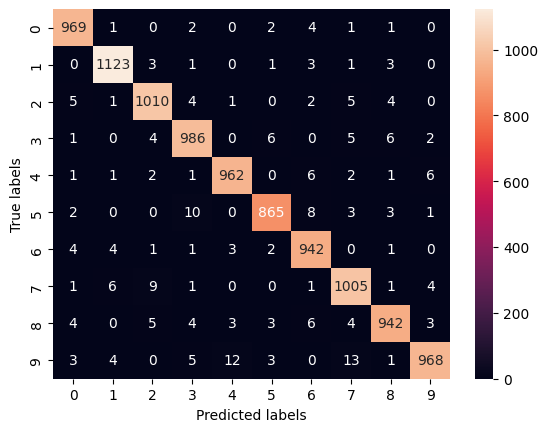

In [145]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_label, pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


Looks like our model is predicting the labels pretty accurately overall.